In [35]:

import json
import matplotlib.pyplot as plt
import numpy as np 

def draw_comparatives(category_name, base_pth, turns, budget):
    base_pth = base_pth.format(category_name)
    metric_pth = base_pth+"_metrics"
    greedy_prob_pth = base_pth + f"_prob_greedy_{turns}_{budget}"
    random_prob_pth = base_pth +f"_prob_random_{turns}_{budget}"
    with open(greedy_prob_pth, "r") as f:
        c_list = json.load(f)
    with open(random_prob_pth, "r") as fg:
        c_list2 = json.load(fg)
        
    with open(metric_pth, "r") as f:
        metric_dic = json.load(f)
    greedy_f1_prob = []
    random_f1_prob = []
    for id_p, prob in enumerate(c_list2):
        random_f1_prob.append((metric_dic[str(id_p)]['f1'], prob))
    for id_p, prob in enumerate(c_list):
        greedy_f1_prob.append((metric_dic[str(id_p)]['f1'], prob))
    o1 = sorted(greedy_f1_prob, key=lambda r:r[1], reverse=True)
    o2 = sorted(greedy_f1_prob, key=lambda r:r[0], reverse=True)
    o3 = sorted(random_f1_prob, key=lambda r:r[1], reverse=True)
    o4 = sorted(random_f1_prob, key=lambda r:r[0], reverse=True)
    random_mrr = o3.index(o4[0])+1
    greedy_mrr = o1.index(o2[0])+1
    return o1,o2,o3,o4, greedy_mrr, random_mrr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


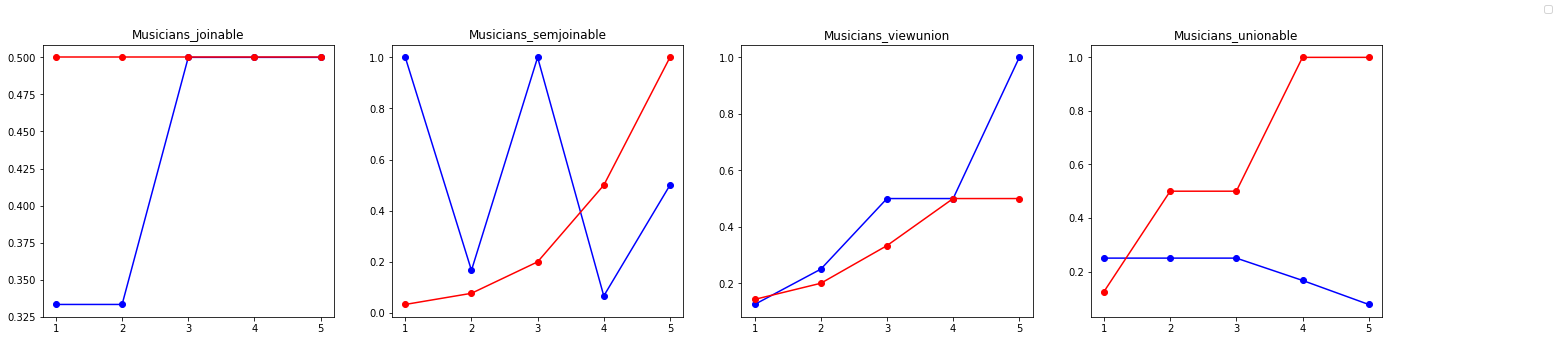

In [36]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(24,5))

name_1 = ["joinable", "semjoinable", "viewunion", "unionable"]
template_c = "Musicians_{}"
base_pth = "/root/autodl-tmp/prompt-matcher-reduce-uncertainty/CRS/{}"
category_list = [template_c.format(i) for i in name_1]

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
ax_l = [ax1, ax2, ax3, ax4]

for id_ax, i in enumerate(category_list):
    if "unionable" in i:
        turns = 5
        budget = 120
    else:
        turns =  5
        budget = 100
    turns_list = [i+1 for i in range(turns)]
    random_y = []
    greedy_y = []
    for turn in range(turns):
        op, op2,op3, op4,g_mrr,r_mrr = draw_comparatives(i, base_pth, turn+1, budget)
        random_y.append(1/r_mrr)
        greedy_y.append(1/g_mrr)
    ax_l[id_ax].plot(turns_list, random_y, color='b',linestyle='-', marker='o')
    ax_l[id_ax].plot(turns_list, greedy_y, color='r', linestyle='-', marker='o')
    ax_l[id_ax].set_title(i)
    ax_l[id_ax].set_xticks(turns_list)
# 显示图例
fig.legend()
 
# 显示图表
plt.show()